# HW Assignment-4

In this assignment, you are going to practice your exploratory data analysis skills. Each question is accompanied by an incomplete function. Your task is to construct the body of those functions with appropriate return types.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Instructions**

---
Copy this assignment to you Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it <font color = 'green'>`Lastname_Firstname_HW4`</font>.

When you're done please submit your solutions as a Colab file. To do so:


1.  Go to and click on <font color="red">`File`</font>  at the top left on the Colab screen,then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the ipynb version of your work on your SUCourse submission.


For any question, send an email to `afshannabi@sabanciuniv.edu`.

In the following functions, the docstrings explain the input and output types desired. Replace `pass` with your own code. Do not change anything else; or your code will fail tests.  


*Sample question:*   
Write a function which shows the top n rows of the dataframe.

---



*Sample function definition:*  

``` py 
def returnFirstN(df,n):
    '''
    df: (dataframe) any dataframe 
    n: (int) number of rows to return
    returns: (dataframe) first n rows of df 
    '''
    pass
```


---


*Sample solution:*  
   
``` py
def returnFirstN(df,n):
    '''
    df: (dataframe) any dataframe 
    n: (int) number of rows to return
    returns: (dataframe) first n rows of df 
    '''
    return df.head(n)
```

**Additional Note:**

In the shared folder, you will see some datasets. The following questions require you to read the datasets into dataframes. Therefore, you need to **add the datasets to your own drive (Right Click->Add to My Drive)**, in addition to the colab notebook as stated in the instructions. And lastly, please **do not forget to mount to your drive** by executing the cell below.

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## Exploratory Data Analysis

> Exploratory data analysis is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there.

John Tukey



## About the Dataset
This dataset consists of data from 1985 Ward's Automotive Yearbook. Here are the sources:

Sources:
 >1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.  
 2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038  
 3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

**Content**  
This data set consists of three types of entities:  
(a) the specification of an auto in terms of various characteristics,   
(b) its assigned insurance risk rating,  
(c) its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os.path import join

%matplotlib inline

The first step is to read in the data.

In [8]:
path = "/content/drive/My Drive/Sabanci University/Junior Year/CS 210/Recitation 4 - Assignment/Automobile_data.csv"
filename = "Automobile_data.csv"
df = pd.read_csv("/content/drive/My Drive/Sabanci University/Junior Year/CS 210/Recitation 4 - Assignment/Automobile_data.csv")
df.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Data Cleaning

### Q1-Changing Column Names

Change the column name "make" to "manufacturer".

In [0]:
def changeColumnName(df):
    return df.rename(columns={"make": "manufacturer"})
    pass

In [10]:
#DO NOT CHANGE OR REMOVE
df = changeColumnName(df)
df.head(5)

,symboling,normalized-losses,manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Q2-Consistent NaN values

Replace all column values which contain ‘?’ or n.a with Numpy's nan value, np.nan.

In [0]:
def replaceWithNaN(df):
    return df.replace(to_replace ="?", value =np.nan)
    pass

In [12]:
#DO NOT CHANGE OR REMOVE
df = replaceWithNaN(df)
df.head(5)


,symboling,normalized-losses,manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Q3-Converting to Numeric Type

Columns `"normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"` should be numeric.

In [0]:
def makeNumericCols(df, *args):
  df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]] = df[["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]].apply(pd.to_numeric)
  return df
  pass

In [14]:
# In case you are using other arguments in the function above, do not forget them while calling the function
#DO NOT CHANGE OR REMOVE
df = makeNumericCols(df)
df.dtypes

symboling              int64
normalized-losses    float64
manufacturer          object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Q4-NaN Ratios

Find the proportion of na values present in all the columns.

In [15]:
def checkNaProportion(df):
  return df.isnull().sum(axis=0)/df.shape[0]
  pass
checkNaProportion(df)

symboling            0.000000
normalized-losses    0.200000
manufacturer         0.000000
fuel-type            0.000000
aspiration           0.000000
num-of-doors         0.009756
body-style           0.000000
drive-wheels         0.000000
engine-location      0.000000
wheel-base           0.000000
length               0.000000
width                0.000000
height               0.000000
curb-weight          0.000000
engine-type          0.000000
num-of-cylinders     0.000000
engine-size          0.000000
fuel-system          0.000000
bore                 0.019512
stroke               0.019512
compression-ratio    0.000000
horsepower           0.009756
peak-rpm             0.009756
city-mpg             0.000000
highway-mpg          0.000000
price                0.019512
dtype: float64

### Q5-Fill NaN Values

Fill NaN values with the mean value of their corresponding columns.

In [0]:
def fillNaWithMean(df):
    df= df.fillna(df.mean())
    return df
    pass

In [17]:
#DO NOT CHANGE OR REMOVE
df = fillNaWithMean(df)
df.head(10)

,symboling,normalized-losses,manufacturer,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


## Global Properties

### Q1-Column Distribution


Given a column name, plot a histogram to display the distribution in that column.

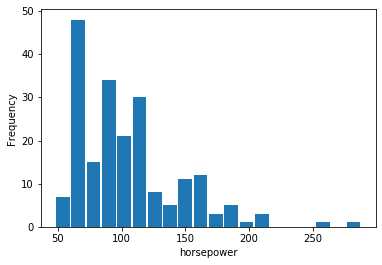

In [18]:
def plotHist(df, col, bins):
  x= df[col].hist(grid=False, bins=bins, rwidth=0.9)
  x.set_ylabel("Frequency", size=10)
  x.set_xlabel(col, size=10)
  return x
  pass

plotHist(df, "horsepower", 20)

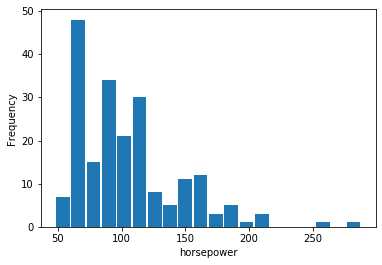

In [19]:
plotHist(df, "horsepower", 20)

### Q2-Outliers

![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

Given a column, display a boxplot to show the distribution in that column. Comment on your findings with respect the distribution and outliers.

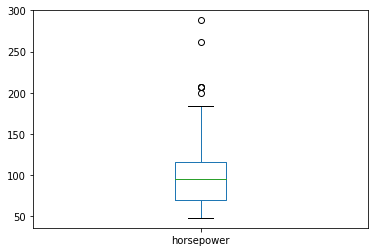

In [20]:
def boxplot(df, col):
  return df.boxplot(column=[col], grid= False)
  pass

boxplot(df, "horsepower")

**Your Comments:** ...

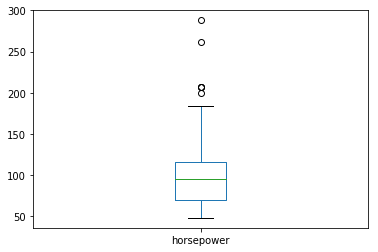

In [0]:
boxplot(df, "horsepower")

### Q3-Displaying Relationships

Given two columns, display a scatter plot in which column values are placed in x and y axes.

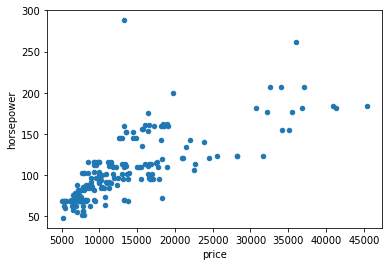

In [21]:
def plotScatter(df, col1, col2):
  return df.plot.scatter(x=col1,y=col2)
  pass
plotScatter(df, "price", "horsepower")

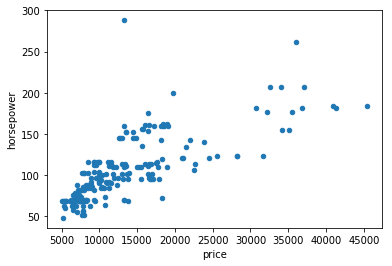

In [0]:
plotScatter(df, "price", "horsepower")

### Q4-Correlation between Columns

Given a list of column names, create and plot the correlation matrix among them. In addition, write down your remarks and comments from the resulting figure.

**Hint:** You may check this [link](https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow) to change the size of a matshow figure.

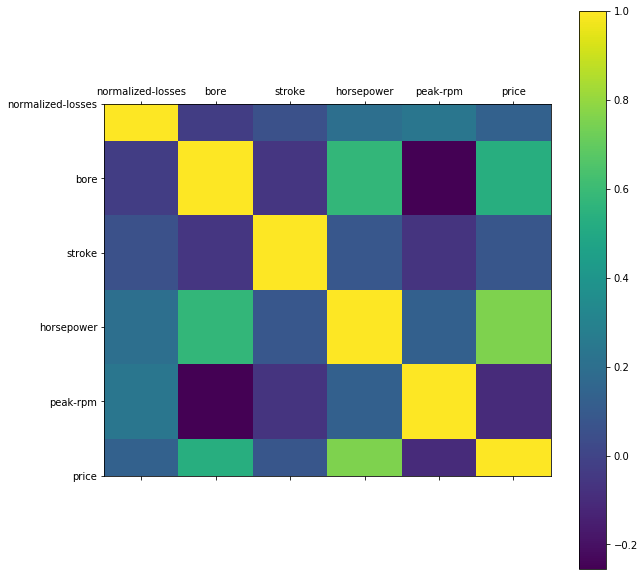

In [22]:
import matplotlib.pyplot as plt

def plotCorr(df, cols):
  x_pos = [i for i, _ in enumerate(cols)]
  plt.figure(figsize=(10,10))
  plt.matshow(df[cols].corr(), fignum=1)
  plt.xticks(x_pos, cols)
  plt.yticks(x_pos, cols)
  plt.colorbar()
  return 
  pass
plotCorr(df, ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"])

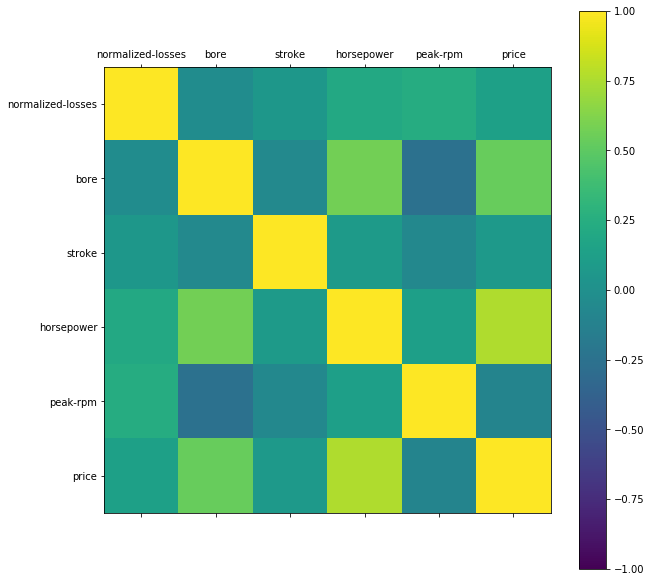

In [0]:
plotCorr(df, ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"])

**Your Comments:** ...

## Group Properties

### Q1-The Most Expensive Car

Print the most expensive for car with its name and price.

In [39]:
def mostExpensiveCar(df):
    mostexp = df[['manufacturer', 'price']][df.price == df['price'].max()]
    print(mostexp)
mostExpensiveCar(df)

     manufacturer    price
74  mercedes-benz  45400.0


### Q2-Total Production

Print the total amount of cars produced for each manufacturer.

In [38]:
def carsPerCompany(df):
  totalNumCars = df[['manufacturer', 'price']].groupby('manufacturer').count()
  totalNumCars = totalNumCars.rename(columns = {'price': 'amount-produced'})
  print (totalNumCars)
carsPerCompany(df)

               amount-produced
manufacturer                  
alfa-romero                  3
audi                         7
bmw                          8
chevrolet                    3
dodge                        9
honda                       13
isuzu                        4
jaguar                       3
mazda                       17
mercedes-benz                8
mercury                      1
mitsubishi                  13
nissan                      18
peugot                      11
plymouth                     7
porsche                      5
renault                      2
saab                         6
subaru                      12
toyota                      32
volkswagen                  12
volvo                       11


### Q3-Max Priced Cars

Print each manufacturer’s highest price car.

In [37]:
def highestPricedCarsByMake(df):
    richyrich = df[['manufacturer', 'price']].groupby('manufacturer').max()
    print(richyrich)
highestPricedCarsByMake(df)

                      price
manufacturer               
alfa-romero    16500.000000
audi           23875.000000
bmw            41315.000000
chevrolet       6575.000000
dodge          12964.000000
honda          12945.000000
isuzu          13207.129353
jaguar         36000.000000
mazda          18344.000000
mercedes-benz  45400.000000
mercury        16503.000000
mitsubishi     14869.000000
nissan         19699.000000
peugot         18150.000000
plymouth       12764.000000
porsche        37028.000000
renault         9895.000000
saab           18620.000000
subaru         11694.000000
toyota         17669.000000
volkswagen     13845.000000
volvo          22625.000000


### Q4-Average Horsepower

Print the average horsepower of each manufacturer.

In [32]:
def housePowerByMake(df):
    averageHP = df[['manufacturer', 'horsepower']].groupby(by='manufacturer').mean()
    print(averageHP)
housePowerByMake(df)

               horsepower
manufacturer             
alfa-romero    125.333333
audi           121.000000
bmw            138.875000
chevrolet       62.666667
dodge           86.333333
honda           80.230769
isuzu           77.000000
jaguar         204.666667
mazda           85.529412
mercedes-benz  146.250000
mercury        175.000000
mitsubishi     104.076923
nissan         102.555556
peugot          99.818182
plymouth        86.714286
porsche        210.400000
renault        104.256158
saab           126.666667
subaru          86.250000
toyota          92.781250
volkswagen      81.083333
volvo          128.000000


### Q5-Risk for Each Manufacturer

Utilize a bar plot to display the average symboling (risk) for each manufacturer.

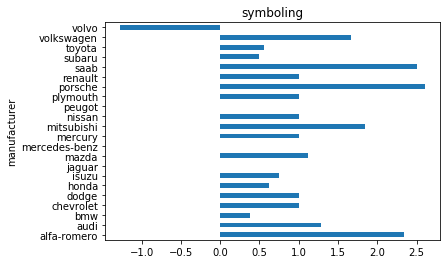

In [33]:
def plotRisk(df, col):
  risk = df[['manufacturer', col]].groupby(by = 'manufacturer').mean()
  risk.plot.barh(title = col, legend = False)
plotRisk(df, "symboling")

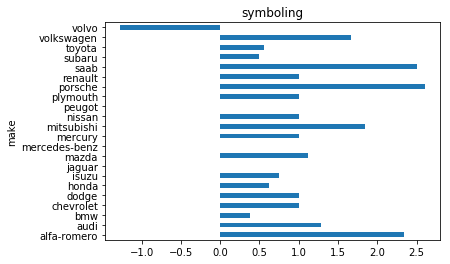

In [0]:
plotRisk(df, "symboling")